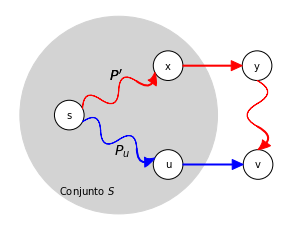

In [146]:
from cmath import atan
from glob import glob
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random 

import math
def punto_medio(x1,y1,x2,y2,s,fra): 
    dx = x1 - x2 
    dy = y1 - y2 
    ang = (math.pi/2 if dy > 0 else (3*math.pi)/2) if dx == 0 else math.atan(dy/dx)
    ang = ang + 2* math.pi if ang < 0 else ang
    x = math.sqrt((x1- x2)**2 + (y1 - y2)**2)*fra
    y = s 
    xp = x*math.cos(ang) - y*math.sin(ang)
    yp = x*math.sin(ang) + y*math.cos(ang)
    ##llegué a la conclusión que tienes que trasladarlo a el que tiene la menor x 
    xp = xp + (x1 if x1 < x2 else x2) 
    yp = yp + (y1 if x1 < x2 else y2 )
    return (xp,yp)
def inter_points(rad,x1,y1,x2,y2): 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)

def crear_zigzag(p1,p2,n): 
    #crear los puntos 
    x,y = p1
    u,v = p2
    puntos =[p1] 
    codes = [Path.MOVETO]
    ant = p1 
    for i in range(1,n+1):
        xd,yd = punto_medio(x,y,u,v,0,i/n)
        #punto de control 
        xc,yc = punto_medio(ant[0],ant[1],xd,yd,random.randint(1,2)*(1-2*(i%2)),0.5)
        puntos.append((xc,yc))
        #punto de destino 
        puntos.append((xd,yd))
        codes.append(Path.CURVE3)
        codes.append(Path.CURVE3)
        ant= (xd,yd)
    puntos.append(p2)
    codes.append(Path.STOP)
    return Path(puntos,codes)

def zigzag(ax,p1,p2,n,color,rad): 
    xi,yi = p1
    x,y = xi,yi
    u,v = p2
    style = "Simple, tail_width=1, head_width=10, head_length=11"
    kw = dict(arrowstyle=style, color=color)
    j = 0 
    for i in range(1,n):
        xd,yd = punto_medio(xi,yi,u,v,0,i/n)
        #punto de control
        p = patches.FancyArrowPatch((x, y), (xd, yd),shrinkA = 0, shrinkB= 0,
                                     connectionstyle="arc3,rad={}{}".format("-" if j % 2 == 0 else "",rad),color = color 
                                   )
        x,y = xd,yd
        ax.add_patch(p)
        j = j + 1 
    xd,yd = punto_medio(xi,yi,u,v,0,1)
    p = patches.FancyArrowPatch((x, y), (xd, yd),shrinkA = 0, shrinkB= 0,
                                     connectionstyle="arc3,rad={}{}".format("-" if j % 2 == 0 else "",rad),**kw
                                   )
    ax.add_patch(p)
class Fig2: 
    def poner_arista(self,u,v,n,color,rad):
        xu,yu = self.vers[u]
        xv,yv = self.vers[v]
        zigzag(self.ax,inter_points(1.5,xu,yu,xv,yv),inter_points(1.5,xv,yv,xu,yu),n,color,rad)
    def poner_aristas(self):
#-- de s a x 
        self.poner_arista("s","x",4,"red",0.9)
        self.ax.text(-1,3.5,"$P'$",fontsize = 14)
#-- de s a u 
        self.poner_arista("s","u",4,"blue",0.9)
        self.ax.text(-0.5,-4,"$P_u$",fontsize = 14)
#-- de x a y 
        self.poner_arista("x","y",1,"red",0)
#-- de u a v 
        self.poner_arista("u","v",1,"blue",0)
#---- de y a v
        self.poner_arista("y","v",3,"red",0.9)
        #zigzag(self.ax,inter_points(1.5,xy,yy,xv,yv),inter_points(1.5,xv,yv,xy,yy),4,"red")
        self.ax.text(-1,3.5,"$P'$",fontsize = 14)
    def poner_circulo_S(self): 
        c = Circle((0,0),radius = 10,color = 'lightgray')
        self.ax.add_patch(c)
        self.ax.text(-6,-8,"Conjunto $S$")
    def poner_vertices(self): 
        self.vers = {"s": (-5,0), "u" :(5,-5),"x":(5,5),"v":(14.1,-5),"y":(14,5)} 
        for l,(x,y) in self.vers.items(): 
            c = Circle((x,y),radius = 1.5,facecolor = 'white',edgecolor= 'black')
            self.ax.text(x,y , l ,va ='center',ha='center')
            self.ax.add_patch(c)
    def __init__(self): 
        self.fig,self.ax = plt.subplots() 
        plt.gca().set_aspect('equal', adjustable='box')
        #plt.grid() 
        plt.axis("off")
        self.poner_circulo_S()
        self.poner_vertices() 
        self.poner_aristas() 
        #self.poner_anotacion_explicacion() 
        self.ax.relim()
        self.ax.autoscale_view()
f = Fig2()